**Final Project ISTA 350**

In [ ]:
#Imports 
from bs4 import BeautifulSoup
import pandas as pd
import requests
from datetime import timedelta


In [ ]:
url = 'https://educationdata.org/college-enrollment-statistics'

r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')
print(soup)


<!DOCTYPE html>

<html class="no-js" lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="text/html" http-equiv="content-type">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<!-- This site is optimized with the Yoast SEO plugin v19.6.1 - https://yoast.com/wordpress/plugins/seo/ -->
<title>College Enrollment Statistics [2022]: Total + by Demographic</title>
<meta content="College enrollment statistics for U.S. postsecondary institutions broken down by state, race, ethnicity, gender, age and degree." name="description">
<link href="https://educationdata.org/college-enrollment-statistics" rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="College Enrollment Statistics [2022]: Total + by Demographic" property="og:title"/>
<meta 

name of the table in 
table class = "table-responsive-mobile"

In [ ]:
table = soup.find('table', class_ = 'table-responsive-mobile')
print(table.prettify())
    

<table class="table-responsive-mobile">
 <caption>
  Total College Enrollment (Undergraduate &amp; Graduate Students) from 1950 to 2022, Selected Years
 </caption>
 <tbody>
  <tr>
   <th>
    Year
   </th>
   <th>
    Total Enrollment
   </th>
   <th>
    % Public Institution Enrollment
   </th>
  </tr>
 </tbody>
 <tbody>
  <tr>
   <td style="vertical-align: super">
    2022*
   </td>
   <td style="text-align: right; vertical-align: super">
    20,031,000
   </td>
   <td style="text-align: right; vertical-align: super">
    73.7%
   </td>
  </tr>
  <tr>
   <td style="vertical-align: super">
    2021*
   </td>
   <td style="text-align: right; vertical-align: super">
    20,327,000
   </td>
   <td style="text-align: right; vertical-align: super">
    73.7%
   </td>
  </tr>
  <tr>
   <td style="vertical-align: super">
    2020
   </td>
   <td style="text-align: right; vertical-align: super">
    18,991,798
   </td>
   <td style="text-align: right; vertical-align: super">
    73.0%
   </td

In [ ]:
row_headers = []

for header in table.find_all('tr'):
    for h in header.find_all('th'):
        row_headers.append(h.text)
row_headers
    
        

['Year', 'Total Enrollment', '% Public Institution Enrollment']

In [ ]:
data = []

for col in table.find_all('tr')[1:]:
    td_lst_tags = col.find_all('td')
    td_val = [i.text for i in td_lst_tags] 
    data.append(td_val)

data

[['2022*', '20,031,000', '73.7%'],
 ['2021*', '20,327,000', '73.7%'],
 ['2020', '18,991,798', '73.0%'],
 ['2019', '19,630,178', '73.9%'],
 ['2018', '19,651,412', '74.0%'],
 ['2017', '19,778,151', '73.7%'],
 ['2016', '19,846,904', '73.5%'],
 ['2015', '19,988,204', '72.9%'],
 ['2014', '20,209,092', '72.5%'],
 ['2013', '20,376,677', '72.4%'],
 ['2012', '20,644,478', '72.1%'],
 ['2011', '21,010,590', '71.9%'],
 ['2010', '21,019,438', '72.0%'],
 ['2009', '20,313,594', '72.9%'],
 ['2008', '19,081,686', '73.2%'],
 ['2007', '18,258,138', '73.9%'],
 ['2006', '17,754,230', '74.2%'],
 ['2005', '17,487,475', '74.5%'],
 ['2004', '17,272,044', '75.2%'],
 ['2003', '16,911,481', '76.0%'],
 ['2002', '16,611,711', '76.8%'],
 ['2001', '15,927,987', '76.8%'],
 ['2000', '15,312,289', '76.8%'],
 ['1999', '14,849,691', '76.6%'],
 ['1998', '14,506,967', '76.8%'],
 ['1997', '14,502,334', '77.2%'],
 ['1996', '14,367,520', '77.4%'],
 ['1995', '14,261,781', '77.8%'],
 ['1994', '14,278,790', '78.0%'],
 ['1993', '1

In [ ]:
df = pd.DataFrame(data[2:], columns= row_headers)

df['Year'] = pd.to_datetime(df['Year'])

#df['Total Enrollment'] = df['Total Enrollment'].astype(float)
#df['% Public Institution Enrollment'] = df['% Public Institution Enrollment'].astype(int)

In [ ]:
lst = []
for value in df['Total Enrollment']:
    lst.append(int(value.replace(',','')))
df['Total Enrollment'] = lst
df


,Year,Total Enrollment,% Public Institution Enrollment
0,2020-01-01,18991798,73.0%
1,2019-01-01,19630178,73.9%
2,2018-01-01,19651412,74.0%
3,2017-01-01,19778151,73.7%
4,2016-01-01,19846904,73.5%
5,2015-01-01,19988204,72.9%
6,2014-01-01,20209092,72.5%
7,2013-01-01,20376677,72.4%
8,2012-01-01,20644478,72.1%
9,2011-01-01,21010590,71.9%


In [ ]:
#can only run once
lst = []
for value in df['% Public Institution Enrollment']:
    lst.append(float(value.replace('%','')))
df['% Public Institution Enrollment'] = lst
df['% Public Institution Enrollment'] = df['% Public Institution Enrollment']/100
df

,Year,Total Enrollment,% Public Institution Enrollment
0,2020-01-01,18991798,0.730
1,2019-01-01,19630178,0.739
2,2018-01-01,19651412,0.740
3,2017-01-01,19778151,0.737
4,2016-01-01,19846904,0.735
5,2015-01-01,19988204,0.729
6,2014-01-01,20209092,0.725
7,2013-01-01,20376677,0.724
8,2012-01-01,20644478,0.721
9,2011-01-01,21010590,0.719


In [ ]:
df.dtypes

Year                               datetime64[ns]
Total Enrollment                            int64
% Public Institution Enrollment           float64
dtype: object

In [ ]:
df["Total Public Enrollment"] = df['Total Enrollment']*df['% Public Institution Enrollment']
df

,Year,Total Enrollment,% Public Institution Enrollment,Total Public Enrollment
0,2020-01-01,18991798,0.730,1.386401e+07
1,2019-01-01,19630178,0.739,1.450670e+07
2,2018-01-01,19651412,0.740,1.454204e+07
3,2017-01-01,19778151,0.737,1.457650e+07
4,2016-01-01,19846904,0.735,1.458747e+07
5,2015-01-01,19988204,0.729,1.457140e+07
6,2014-01-01,20209092,0.725,1.465159e+07
7,2013-01-01,20376677,0.724,1.475271e+07
8,2012-01-01,20644478,0.721,1.488467e+07
9,2011-01-01,21010590,0.719,1.510661e+07


In [ ]:
import matplotlib.pyplot as plt
import numpy as np, statsmodels.api as sm
from matplotlib.pyplot import figure

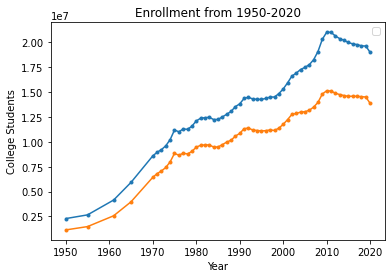

In [ ]:
plt.plot(df['Year'], df['Total Enrollment'], marker='.')
plt.plot(df['Year'], df['Total Public Enrollment'], marker='.')


plt.title('Enrollment from 1950-2020')
plt.ylabel('College Students' )
plt.xlabel('Year' )


plt.y_ticks = df['Total Enrollment']
plt.x_ticks = df['Year']

plt.legend()
plt.show()



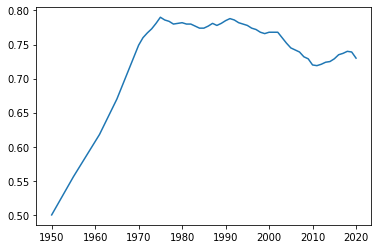

In [ ]:
plt.plot(df['Year'], df['% Public Institution Enrollment'])
plt.show()

In [ ]:
url2 = 'https://educationdata.org/college-dropout-rates/'

req = requests.get(url2)

soup2 = BeautifulSoup(req.text, 'html.parser')
print(soup2)


<!DOCTYPE html>

<html class="no-js" lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="text/html" http-equiv="content-type">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<!-- This site is optimized with the Yoast SEO plugin v19.6.1 - https://yoast.com/wordpress/plugins/seo/ -->
<title>College Dropout Rate [2022]: by Year + Demographics</title>
<meta content="Find data for American college students' dropout and graduation rates, including demographic averages and historical trends." name="description">
<link href="https://educationdata.org/college-dropout-rates" rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="College Dropout Rate [2022]: by Year + Demographics" property="og:title"/>
<meta content="Find data for America

table class="text-mobile-responsive"

In [ ]:
dropout_table = soup2.find('table', class_ = "text-mobile-responsive")
print(dropout_table.prettify())

<table class="text-mobile-responsive">
 <caption>
  Dropouts Among States
 </caption>
 <thead>
  <tr>
   <th>
    State
   </th>
   <th>
    Total Dropouts
   </th>
   <th>
    Under 35
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align: left; vertical-align: super">
    Alabama
   </td>
   <td style="text-align: left; vertical-align: super">
    450,300
   </td>
   <td>
    24.8%
   </td>
  </tr>
  <tr>
   <td style="text-align: left; vertical-align: super">
    Alaska
   </td>
   <td style="text-align: left; vertical-align: super">
    117,912
   </td>
   <td>
    43.9%
   </td>
  </tr>
  <tr>
   <td style="text-align: left; vertical-align: super">
    Arizona
   </td>
   <td style="text-align: left; vertical-align: super">
    681,252
   </td>
   <td>
    44.1%
   </td>
  </tr>
  <tr>
   <td style="text-align: left; vertical-align: super">
    Arkansas
   </td>
   <td style="text-align: left; vertical-align: super">
    304,513
   </td>
   <td>
    39.7%
   </td>
  

In [ ]:
dropout_row_headers =[]
for headers in dropout_table.find_all('tr',):
    for row in headers.find_all('th'):
        dropout_row_headers.append(row.text)

dropout_row_headers

['State', 'Total Dropouts', 'Under 35']

In [ ]:
dropout_data = []

for cols in dropout_table.find_all('tr')[1:]:
    td_lst_tags_dropout = cols.find_all('td')
    td_val_dropout = [i.text for i in td_lst_tags_dropout] 
    dropout_data.append(td_val_dropout)

dropout_data

[['Alabama', '450,300', '24.8%'],
 ['Alaska', '117,912', '43.9%'],
 ['Arizona', '681,252', '44.1%'],
 ['Arkansas', '304,513', '39.7%'],
 ['California', '6,360,375', '30.2%'],
 ['Colorado', '707,584', '27.1%'],
 ['Connecticut', '373,312', '29.3%'],
 ['Delaware', '63,522', '53.7%'],
 ['D.C.', '36,575', '41.5%'],
 ['Florida', '1,596,975', '39.5%'],
 ['Georgia', '744,495', '44.1%'],
 ['Hawaii', '96,224', '49.8%'],
 ['Idaho', '181,897', '40.0%'],
 ['Illinois', '1,892,039', '35.7%'],
 ['Indiana', '745,358', '35.1%'],
 ['Iowa', '374,653', '35.0%'],
 ['Kansas', '381,941', '35.4%'],
 ['Kentucky', '592,803', '33.5%'],
 ['Louisiana', '462,882', '36.1%'],
 ['Maine', '132,459', '34.2%'],
 ['Maryland', '613,138', '37.4%'],
 ['Massachusetts', '695,898', '32.7%'],
 ['Michigan', '1,127,317', '37.6%'],
 ['Minnesota', '594,996', '30.2%'],
 ['Mississippi', '316,491', '45.0%'],
 ['Missouri', '655,908', '37.1%'],
 ['Montana', '110,090', '34.9%'],
 ['Nebraska', '307,345', '26.9%'],
 ['Nevada', '371,384', '28

In [ ]:
dropout_df = pd.DataFrame(dropout_data, columns = dropout_row_headers)
dropout_df

,State,Total Dropouts,Under 35
0,Alabama,"450,300",24.8%
1,Alaska,"117,912",43.9%
2,Arizona,"681,252",44.1%
3,Arkansas,"304,513",39.7%
4,California,"6,360,375",30.2%
5,Colorado,"707,584",27.1%
6,Connecticut,"373,312",29.3%
7,Delaware,"63,522",53.7%
8,D.C.,"36,575",41.5%
9,Florida,"1,596,975",39.5%


In [ ]:
total_dropouts = []
for value in dropout_df['Total Dropouts']:
    total_dropouts.append(int(value.replace(',','')))
dropout_df['Total Dropouts'] = total_dropouts
dropout_df

,State,Total Dropouts,Under 35
0,Alabama,450300,24.8%
1,Alaska,117912,43.9%
2,Arizona,681252,44.1%
3,Arkansas,304513,39.7%
4,California,6360375,30.2%
5,Colorado,707584,27.1%
6,Connecticut,373312,29.3%
7,Delaware,63522,53.7%
8,D.C.,36575,41.5%
9,Florida,1596975,39.5%


In [ ]:
total_dropouts_under35 = []
for value in dropout_df['Under 35']:
    total_dropouts_under35.append(float(value.replace('%','')))
dropout_df['Under 35'] = total_dropouts_under35
dropout_df['Under 35'] = dropout_df['Under 35']/100
dropout_df

dropout_df['Total Under 35'] = round(dropout_df['Total Dropouts']*dropout_df['Under 35'])
dropout_df

In [ ]:
#checking
nation_wide_dropouts = sum(dropout_df['Total Dropouts'])
nation_wide_dropouts

39040099

39,040,099 college dropouts or SCNDs live in the United States as of July 2020.

Text(0.5, 1.0, 'Number of Dropouts Who Live in Each State 2020')

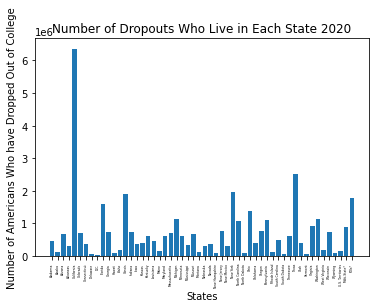

In [ ]:
plt.bar(dropout_df['State'], dropout_df['Total Dropouts'])
plt.xticks(rotation = 90, fontsize=3)
plt.xlabel('States')
plt.ylabel('Number of Americans Who have Dropped Out of College')
plt.title('Number of Dropouts Who Live in Each State 2020')




In [ ]:
df

southwest = pd.DataFrame(dropout_df['State'])



In [ ]:
url3 = 'https://educationdata.org/average-cost-of-college-by-state'

reques = requests.get(url3)

soup3 = BeautifulSoup(reques.text, 'html.parser')
print(soup3)



<!DOCTYPE html>

<html class="no-js" lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="text/html" http-equiv="content-type">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<!-- This site is optimized with the Yoast SEO plugin v19.6.1 - https://yoast.com/wordpress/plugins/seo/ -->
<title>Average Cost of College by State [2022]: Tuition + Fees</title>
<meta content="The most exhaustive list of average college costs by state (public and private) including breakdowns by tuition and total costs." name="description">
<link href="https://educationdata.org/average-cost-of-college-by-state" rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Average Cost of College by State [2022]: Tuition + Fees" property="og:title"/>
<meta content

In [ ]:
table_money = soup3.find('div', class_ = 'entry-content')

print(table_money.prettify())

<div class="entry-content" itemprop="articleBody">
 <p>
  <strong>
   Report Highlights.
  </strong>
  The average college tuition in the U.S. is
  <strong>
   $9,349
  </strong>
  for in-state students and
  <strong>
   $27,023
  </strong>
  for out-of-state students at public 4-year institutions.
 </p>
 <ul>
  <li>
   <strong>
    Vermont
   </strong>
   has the
   <em>
    highest
   </em>
   average yearly in-state tuition of $17,083 at public institutions.
  </li>
  <li>
   <strong>
    Florida
   </strong>
   has the
   <em>
    lowest
   </em>
   average yearly in-state tuition of $4,463 at public institutions.
  </li>
  <li>
   <strong>
    Massachusetts
   </strong>
   has the highest average yearly tuition of $47,980 for
   <em>
    private
   </em>
   institutions.
  </li>
  <li>
   Nationwide, in-state room &amp; board costs account for an additional $11,686 per year on average.
  </li>
 </ul>
 <p>
  <picture>
   <source aria-label="National Map: Average Cost of College for

In [ ]:
row_headers_cost = []

for header in table_money.find_all('tr'):
    for h in header.find_all('th'):
        row_headers_cost.append(h.text)
row_headers_cost = row_headers_cost[0:3]
row_headers_cost

['Rank', 'State', 'In-State Tuition & Fees']

In [ ]:
for row_cost in table_money.find('table'):
    print(row)

<tbody><tr><td style="text-align: left; vertical-align: super;">
1</td>
<td style="text-align: left; vertical-align: super;">Vermont</td>
<td style="text-align: left; vertical-align: super;">$17,083</td>
</tr><tr><td style="text-align: left; vertical-align: super;">
2</td>
<td style="text-align: left; vertical-align: super;">New Hampshire</td>
<td style="text-align: left; vertical-align: super;">$16,679</td>
</tr><tr><td style="text-align: left; vertical-align: super;">
3</td>
<td style="text-align: left; vertical-align: super;">Pennsylvania</td>
<td style="text-align: left; vertical-align: super;">$15,565</td>
</tr><tr><td style="text-align: left; vertical-align: super;">
4</td>
<td style="text-align: left; vertical-align: super;">Illinois</td>
<td style="text-align: left; vertical-align: super;">$14,455</td>
</tr><tr><td style="text-align: left; vertical-align: super;">
5</td>
<td style="text-align: left; vertical-align: super;">New Jersey</td>
<td style="text-align: left; vertical-a

In [ ]:
data_cost =[]

for column_cost in table_money.find_all('tr'):
    td_lst_tags_cost = column_cost.find_all('td')
    td_val_cost = [i.text for i in td_lst_tags_cost] 
    data_cost.append(td_val_cost)

state_costs = data_cost[1:53]
state_costs

[['\n1', 'Vermont', '$17,083'],
 ['\n2', 'New Hampshire', '$16,679'],
 ['\n3', 'Pennsylvania', '$15,565'],
 ['\n4', 'Illinois', '$14,455'],
 ['\n5', 'New Jersey', '$14,360'],
 ['\n6', 'Connecticut', '$13,886'],
 ['\n7', 'Massachusetts', '$13,729'],
 ['\n8', 'Virginia', '$13,655'],
 ['\n9', 'Michigan', '$13,315'],
 ['\n10', 'Rhode Island', '$13,105'],
 ['\n11', 'South Carolina', '$12,497'],
 ['\n12', 'Minnesota', '$11,748'],
 ['\n13', 'Delaware', '$11,091'],
 ['\n14', 'Arizona', '$11,072'],
 ['\n15', 'Kentucky', '$10,888'],
 ['\n16', 'Oregon', '$10,813'],
 ['\n17', 'Alabama', '$10,323'],
 ['\n18', 'Tennessee', '$10,164'],
 ['\n19', 'Hawaii', '$10,109'],
 ['\n20', 'Maine', '$10,103'],
 ['\n21', 'Ohio', '$9,902'],
 ['\n22', 'Maryland', '$9,714'],
 ['\n23', 'Louisiana', '$9,571'],
 ['\n24', 'Iowa', '$9,373'],
 ['\n–', 'U.S. Average', '$9,349'],
 ['\n25', 'Indiana', '$9,268'],
 ['\n26', 'Colorado', '$9,144'],
 ['\n27', 'Kansas', '$9,088'],
 ['\n28', 'Missouri', '$8,992'],
 ['\n29', 'South D

In [ ]:
cost_df = pd.DataFrame(state_costs, columns = row_headers_cost)
cost_df

,Rank,State,In-State Tuition & Fees
0,\n1,Vermont,"$17,083"
1,\n2,New Hampshire,"$16,679"
2,\n3,Pennsylvania,"$15,565"
3,\n4,Illinois,"$14,455"
4,\n5,New Jersey,"$14,360"
5,\n6,Connecticut,"$13,886"
6,\n7,Massachusetts,"$13,729"
7,\n8,Virginia,"$13,655"
8,\n9,Michigan,"$13,315"
9,\n10,Rhode Island,"$13,105"


In [ ]:
no_dollar_sign = []
for value in cost_df['In-State Tuition & Fees']:
    no_dollar_sign.append(value.replace('$',''))

cost_df['In-State Tuition & Fees'] = no_dollar_sign

cost_df


,Rank,State,In-State Tuition & Fees
0,\n1,Vermont,"17,083"
1,\n2,New Hampshire,"16,679"
2,\n3,Pennsylvania,"15,565"
3,\n4,Illinois,"14,455"
4,\n5,New Jersey,"14,360"
5,\n6,Connecticut,"13,886"
6,\n7,Massachusetts,"13,729"
7,\n8,Virginia,"13,655"
8,\n9,Michigan,"13,315"
9,\n10,Rhode Island,"13,105"


In [ ]:
no_commas = []
for c in cost_df['In-State Tuition & Fees']:
    no_commas.append(int(c.replace(',', '')))
cost_df['In-State Tuition & Fees'] = no_commas

cost_df

AttributeError: ignored